# Homework 1 (Dev Mody)
## Exercise 4: Curse of Dimensionality

Let us explore the curse of dimensionality using the above $g(w) = w^T\cdot w + 2$. We start with an initial vector $w_0 = (1, 0, \dots , 0, 0)$ but the length of the vector (the dimension of the space) is no longer 2. Instead let’s call it $N$. We’re not going to search for the minimum but instead we shall just just look around the neighborhood of $w_0$ and determine how many of $P$ randomly generated directions are descent directions. For $N = 1, 2, \dots , 25$ make a plot of the fraction of the $P$ directions that are descent directions. Make a plot of the fraction versus $N$ for the 4 values of $P = 10, 100, 1000, 10000$. Comment on your observations.

ANSWER: The experiment explores the curse of dimensionality by analyzing how the fraction of descent directions decreases as the dimensionality $N$ increases for the function $g(w) = w^T \cdot w + 2$. Starting from an initial vector $w_0 = (1, 0, \dots, 0)$, the fraction of randomly generated directions that are descent directions is computed for dimensions $N = 1$ to $25$ and sample sizes $P = 10, 100, 1000, 10000$. The results show that as $N$ increases, the fraction of descent directions decreases significantly, illustrating the curse of dimensionality. For smaller values of $P$, the fraction is more volatile, while larger $P$ values provide smoother and more reliable estimates. This demonstrates that in high-dimensional spaces, finding descent directions becomes increasingly challenging, and larger sample sizes are necessary to accurately estimate the fraction of descent directions. The experiment highlights the trade-offs between computational cost and accuracy in high-dimensional optimization problems.

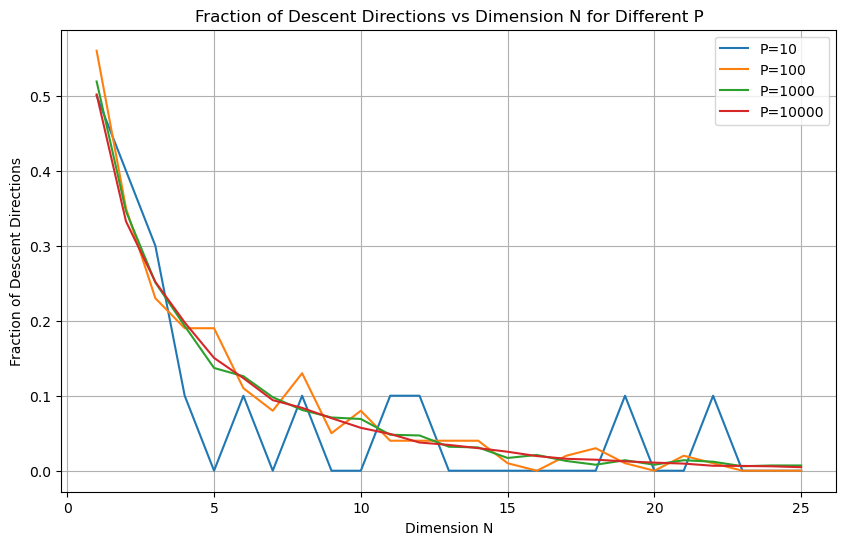

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def find_fraction_of_p(g, w, N, P):
    directions = np.random.randn(P, len(w))
    norms = np.sqrt(np.sum(directions * directions, axis=1))[:, np.newaxis]
    directions = directions / norms

    w_candidates = np.array([g(w + v) for v in directions])
    
    descent_count = np.sum(w_candidates < g(w))
    fraction_p = descent_count / P
    return fraction_p

# Define the quadratic function
g = lambda w: np.dot(w.T, w) + 2

# Define dimensions (N) and sample sizes (P)
N = [i + 1 for i in range(25)]  # Dimensions from 1 to 25
P = [10, 100, 1000, 10000]     # Different values of P

tracker = [[] for _ in range(len(P))]

for n in N:
    for i in range(len(P)):
        w = np.array([1] + [0 for _ in range(n - 1)])
        
        frac = find_fraction_of_p(g, w, n, P[i])
        tracker[i].append(frac)

# Plot results
plt.figure(figsize=(10, 6))
for i, p in enumerate(P):
    plt.plot(N, tracker[i], label=f'P={p}')

plt.xlabel('Dimension N')
plt.ylabel('Fraction of Descent Directions')
plt.title('Fraction of Descent Directions vs Dimension N for Different P')
plt.legend()
plt.grid(True)
plt.show()
